In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from lxml import html
import numpy as np
from sklearn import preprocessing

In [2]:
r = requests.get('https://www.publicschoolreview.com/hereford-high-school-profile') 

In [21]:
s = pd.read_csv('../data/Maryland_Public_School_Enrollment_Trends__Pre-Kindergarten_to_Grade_12__2010-2021.csv')
s.head()
t = pd.read_csv('../data/Choose_Maryland___Compare_Counties_-_Education.csv', nrows = 24)

In [23]:
s.head()

,Date Created,Grades,Year,Baltimore City,Allegany County,Anne Arundel County,Baltimore County,Calvert County,Caroline County,Carroll County,...,Montgomery County,Prince George's County,Queen Anne's County,St. Mary's County,Somerset County,Talbot County,Washington County,Wicomico County,Worcester County,Maryland
0,01/27/2021,Grades Pre-K,2010,4874,506,1670,3613,385,343,271,...,3503,6424,288,807,214,246,538,572,368,29377
1,01/27/2021,Grades K-5,2010,37956,3854,34305,46364,6891,2458,11700,...,64353,54333,3366,7527,1336,1936,10018,6810,2740,374471
2,01/27/2021,Grades 6-8,2010,16659,1952,16782,22574,3847,1126,6138,...,30860,26577,1681,3760,567,907,5059,2998,1455,184068
3,01/27/2021,Grades 9-12,2010,24311,2710,22724,31609,5672,1590,9225,...,45307,39337,2446,5177,803,1415,6591,4002,2136,264055
4,01/27/2021,Grades Pre-K,2011,4852,499,1892,3631,386,324,296,...,3627,5495,252,701,201,268,485,654,389,28850


In [36]:
s.rename(columns = {'Baltimore County': 'Baltimore_County', 'Harford County': 'Harford_County'}, inplace = True) 

In [37]:
q =s[s['Grades'] == 'Grades 9-12']
z = q.transpose()
z.head(7)

,3,7,11,15,19,23,27,31,35,39,43,47
Date Created,01/27/2021,01/27/2021,01/27/2021,01/27/2021,01/27/2021,01/27/2021,01/27/2021,01/27/2021,04/08/2022,04/08/2022,04/08/2022,09/20/2022
Grades,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12,Grades 9-12
Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Baltimore City,24311,23706,23372,22882,22341,21746,21381,20763,20653,21074,21841,22420
Allegany County,2710,2660,2664,2570,2590,2559,2504,2531,2447,2380,2422,2392
Anne Arundel County,22724,22696,22650,22523,22712,22671,22858,23221,23389,23887,24303,24910
Baltimore_County,31609,30993,31034,30740,30925,31015,31167,31668,32150,33006,33341,34060


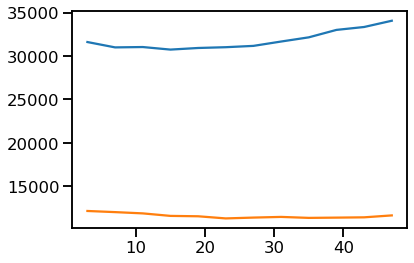

In [40]:
plt.plot(q.Baltimore_County)
plt.plot(q.Harford_County)

In [13]:
t.rename(columns = {'Annual Number of Public High School Graduates': 'highschoolgrads',
                    'Public School Student-Teacher Ratio':'studteachratio',
                    'Public School Expenditures Per Pupil ($ Dollars)':'expense_per_pupil',
                    'Bachelors Degree Attainment (%)':'bach_degree_pct', 
                    'High School Attainment (%)':'grad_rate_pct', 
                    '2-Year College Enrollment':'2_year_college_enrollment', 
                    '4-Year College/University Enrollment':'4_year_college_enrollment'}, inplace = True) 
t.head()

,County,highschoolgrads,studteachratio,expense_per_pupil,Bachelor's Degree Attainment (%),grad_rate_pct,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities,2_year_college_enrollment,4_year_college_enrollment
0,Allegany County,642,13.9,13771,18.3,90.0,1,1,2586.0,4831.0
1,Anne Arundel County,5268,14.7,13648,40.9,92.1,1,2,12655.0,548.0
2,Baltimore City,4108,16.1,15376,31.2,84.9,1,11,4909.0,59254.0
3,Baltimore County,7171,15.1,13880,38.6,91.1,1,7,17732.0,42571.0
4,Calvert County,1227,15.7,14062,31.1,93.9,0,0,NaN,NaN


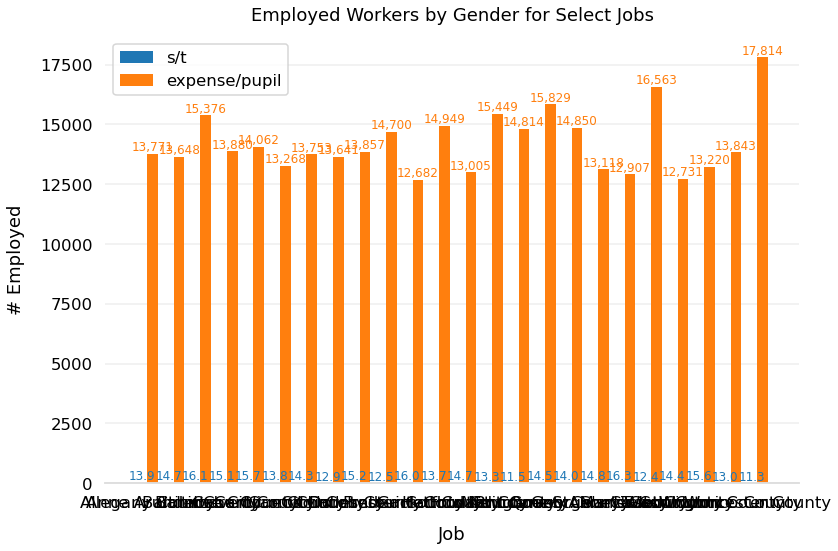

In [18]:
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(12, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(t.County.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x, t.studteachratio,
            width=bar_width, label='s/t')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, t.expense_per_pupil,
            width=bar_width, label='expense/pupil')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(t.County.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Job', labelpad=15)
ax.set_ylabel('# Employed', labelpad=15)
ax.set_title('Employed Workers by Gender for Select Jobs', pad=15)

fig.tight_layout()




for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

<BarContainer object of 24 artists>

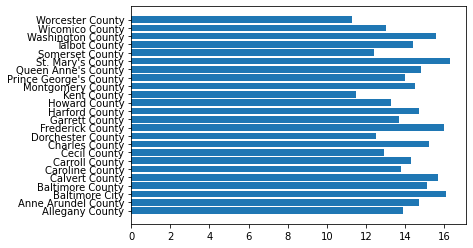

In [5]:
plt.barh(t.County, t.studteachratio)

<BarContainer object of 24 artists>

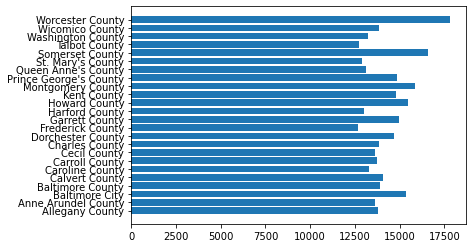

In [6]:
plt.barh(t.County, t.expense_per_pupil)

<BarContainer object of 24 artists>

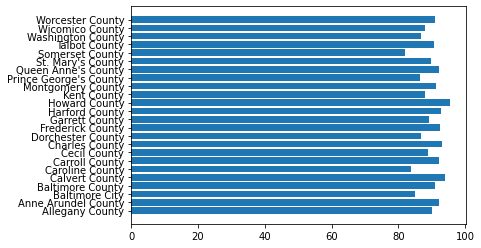

In [7]:
plt.barh(t.County, t.grad_rate_pct)

In [8]:
print(r.content)

b'<!DOCTYPE html><html\nlang="en" id="top-of-site"><head><link\nrel="dns-prefetch" href="https://www.googletagmanager.com/" ><link\nrel="dns-prefetch" href="https://static.publicschoolreview.com/" ><link\nrel="dns-prefetch" href="https://images1.publicschoolreview.com/" ><link\nrel="dns-prefetch" href="https://images2.publicschoolreview.com/" ><link\nrel="dns-prefetch" href="https://images3.publicschoolreview.com/" >\n <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n        new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n        j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n        \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n        })(window,document,\'script\',\'dataLayer\',\'GTM-KVXLX\');</script> <title>Hereford High School (2022-23 Ranking) - Parkton, MD</title><meta\nhttp-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta\nname="format-detection" conte

In [9]:
print(r.url)

https://www.publicschoolreview.com/hereford-high-school-profile


In [10]:
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html id="top-of-site" lang="en">
 <head>
  <link href="https://www.googletagmanager.com/" rel="dns-prefetch"/>
  <link href="https://static.publicschoolreview.com/" rel="dns-prefetch"/>
  <link href="https://images1.publicschoolreview.com/" rel="dns-prefetch"/>
  <link href="https://images2.publicschoolreview.com/" rel="dns-prefetch"/>
  <link href="https://images3.publicschoolreview.com/" rel="dns-prefetch"/>
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
        new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-KVXLX');
  </script>
  <title>
   Hereford High School (2022-23 Ranking) - Parkton, MD
  </title>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="telephone=n

In [11]:
highschools = ['Hereford', 'Franklin', 'Owings Mills', 'Dulaney', 'New Town', 'Pikesville', 'Towson', 
               'Loch Raven', 'Perry Hall', 'Parkville', 'Randallstown', 'Milford Mill Academy', 'Woodlawn', 
               'Catonsville', 'Landsdowne', 'Overlea', 'Kenwood', 'Eastern Technical', 'Dundalk', 'Chesapeake', 
               'Patapsco', 'Sparrows Point', 'Western School of Technology', 'George Washington Carver Center']

In [12]:
for i in page:
    #requests.get(f'https://www.publicschoolreview.com/{highschools}-high-school-profile')
    
    page = requests.get(f'https://www.publicschoolreview.com/{highschools}-high-school-profile')
 

    tree = html.fromstring(page.content) 
    
    students = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[2]/strong/text()')
    stratio = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[3]/strong/text()')
    minoritypct = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[4]/strong/text()')
    radrate = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[5]/strong/text()')
    testrank = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[6]/strong/text()')
    mathprof = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[7]/strong/text()')
    readprof = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[8]/strong/text()')

    print(students)

NameError: name 'page' is not defined

In [ ]:
page = requests.get('https://www.publicschoolreview.com/overlea-high-school-profile')
page